Roddsi Sarkar (UIN - 334003075)


# Problem Introduction

Energy transition, wherein countries are preparing to shift from fossil based energy to renewable sources of energy in the modern world requires dependence on local weather and geographic conditions. In this analysis and study, our main objective is to understand how extreme weather events impact performance of the photovoltaic plants in several regions of the United States.The idea is that if we can do this analysis for the US, we can also extend it to other countries and better understand and facilitate renewable energy generation given the weather patterns and events are vastly different across countries and geographies. We perform statistical learning techniques like Regression and classification to predict the performance and irradiation values given the measurements above.

For this analysis, we have used 2 regression techniques - using Ordinary Least Squares and its variation Ridge regression to predict "PR" and 2 classification techniques - Random Forest classifier and Decision tree classifier to predict "low_irradiation". I have used the sklearn library.

# Data Set Information

We have data available from 3 primary sources - measurements of extreme weather conditions, plant production data and operation and maintenance tickets. Not all of these data is useful as some contains unwanted noise which may have been introduced during incorrect recording of data or missing data. There are a total of 51504 observations and 38 variables out of which "PR" and "low_irradiation" will be our two target/response variables and some combination of the others will be considered as predictors. Simply put, PR/Performance ratio captures the energy losses while irradiation is in the context of solar irradiance where higher the irradiance, greater is the output solar energy. Plant production data includes parameters like "hurr_production_level"; operation and maintenenance tickets includes data like "snow_bin_ticket_minutes" and lastly, an example of extreme weather conditions would be "cumulative_snow_mm".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Loading the dataset
energydata = pd.read_csv('energydata.csv')


# Proposed Approach/Methodology

First, I will be viewing the dataset and see if there are any strong correlations among variables. If there are misisng data, I will deal with that using some method of imputation separately for numeric and categorical data. Next, I will perform 2 classification techniques and 2 regression techniques to predict "PR" and "low_irradiation" respectively given some non trivial combination of the predictors.We will see how the models perform and evaluate them. Lastly, I will discuss the limitations of this stud and analysis and scope out any future improvements.

#Viewing the Energy dataset

We check the shape of the dataset to get a sense of the size of the dataset we will be analyzing. We see there are 51504 rows and 38 columns.

In [3]:
#checking the shape of the dataset
energydata.shape

(51504, 38)

We print the first and last 5 rows of the dataset and look at the values. The data appears sorted in some manner (realized it is time series) which leads us to think that w:e might need to split randomly into train and test datasets when we implement statistical learning techniques to analyze the data in order to count in the variability.

In [4]:
# Print the first 5 records.
print(energydata.head())

  randid      Date NOAAClimRegion TempZone HumidZone bin_PlantSize_kW  \
0   C2S1  4/1/2018           West       T6        H4            large   
1   C2S1  4/2/2018           West       T6        H4            large   
2   C2S1  4/3/2018           West       T6        H4            large   
3   C2S1  4/4/2018           West       T6        H4            large   
4   C2S1  4/5/2018           West       T6        H4            large   

   plant_age_months active_snow_tickets snow_bin_ticket_minutes  \
0              19.0                  No                    None   
1              19.0                  No                    None   
2              19.0                  No                    None   
3              19.0                  No                    None   
4              19.0                  No                    None   

  snow_affected_assets  ... storm_affected_assets  storm_production_level  \
0                 None  ...                  None                 Unknown   
1   

In [ ]:
# Print the last 5 records.
print(energydata.tail())

      randid       Date NOAAClimRegion TempZone HumidZone bin_PlantSize_kW  \
51499  C3S40  7/27/2019      Southeast       T5        H4           medium   
51500  C3S40  7/28/2019      Southeast       T5        H4           medium   
51501  C3S40  7/29/2019      Southeast       T5        H4           medium   
51502  C3S40  7/30/2019      Southeast       T5        H4           medium   
51503  C3S40  7/31/2019      Southeast       T5        H4           medium   

       plant_age_months active_snow_tickets snow_bin_ticket_minutes  \
51499              31.0                  No                    None   
51500              31.0                  No                    None   
51501              31.0                  No                    None   
51502              31.0                  No                    None   
51503              31.0                  No                    None   

      snow_affected_assets  ... storm_affected_assets  storm_production_level  \
51499                 N

Next, we look at the dataset and observe that there are 13 columns with missing values in some rows. Out of these 13, we have 5 numerical and 8 categorical columns with missing data. (**Note - The 0s and 1s have been erroneously categorised as numerical even though they are categorical data. Hence, we see the discrepancy in the count value of datatypes.**)

In [ ]:
energydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51504 entries, 0 to 51503
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   randid                    51504 non-null  object 
 1   Date                      51504 non-null  object 
 2   NOAAClimRegion            51504 non-null  object 
 3   TempZone                  51504 non-null  object 
 4   HumidZone                 51504 non-null  object 
 5   bin_PlantSize_kW          51504 non-null  object 
 6   plant_age_months          51356 non-null  float64
 7   active_snow_tickets       51504 non-null  object 
 8   snow_bin_ticket_minutes   51504 non-null  object 
 9   snow_affected_assets      51504 non-null  object 
 10  snow_production_level     51437 non-null  object 
 11  PR                        49940 non-null  float64
 12  snow_value_mm             45682 non-null  float64
 13  total_daily_snow_mm       45327 non-null  float64
 14  low_ir

We check the percentage of missing values to see if we need to deal with the data or we can ignore and just drop the columns. For instance, the missing values percentage for column "plant_age_months" is just 0.28 which is why we might consider using a mean imputation method as opposed to column "cumulative_snow_mm" which is 23.838 (comparatively high) and may need to impute missing data via less biased imputation methods. So far, none of the columns have very high missing data, therefore we need not drop columns.
**For the sake of simplicity, we will impute the numerical data with their median values**

In [ ]:
energydata.isnull().sum() / energydata.shape[0] * 100

randid                       0.000000
Date                         0.000000
NOAAClimRegion               0.000000
TempZone                     0.000000
HumidZone                    0.000000
bin_PlantSize_kW             0.000000
plant_age_months             0.287356
active_snow_tickets          0.000000
snow_bin_ticket_minutes      0.000000
snow_affected_assets         0.000000
snow_production_level        0.130087
PR                           3.036657
snow_value_mm               11.303976
total_daily_snow_mm         11.993243
low_irradiation              0.000000
cumulative_snow_mm          23.838925
hurr_bin_ticket_minutes      0.000000
hurr_affected_assets         0.000000
hurr_production_level        0.033007
HurricanePrep                0.000000
HurricanePostInspection      0.000000
hurricane                   11.166123
nearest_hurricane            0.000000
wind_speed_mean              0.000000
rain_value_mm               20.971187
nearest_rain                 0.000000
storm_active

Splitting the dataset and storing numerical and categorical variables separately:

**We need to take note that low_irradiation variable is a binary variable**
and therefore the number of numerical features will be 17.

In [5]:
#numerical features
numerical_data = energydata.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 18 numerical features: 

['plant_age_months', 'PR', 'snow_value_mm', 'total_daily_snow_mm', 'low_irradiation', 'cumulative_snow_mm', 'hurricane', 'nearest_hurricane', 'rain_value_mm', 'nearest_rain', 'lightning', 'storm', 'duration_minutes_storm', 'nearest_storm', 'flood', 'duration_minutes_flood', 'nearest_flood', 'rain']


In [6]:
#Summary statistics of numerical features
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
plant_age_months,51356.0,39.707726,25.254713,-6.0,20.000000,36.000000,55.000000,123.000000
PR,49940.0,0.623206,0.299353,0.0,0.586168,0.753464,0.805191,1.199583
snow_value_mm,45682.0,1.257194,10.556568,0.0,0.000000,0.000000,0.000000,275.737309
total_daily_snow_mm,45327.0,2.927878,17.889680,0.0,0.000000,0.000000,0.000000,301.904108
low_irradiation,51504.0,0.305297,0.460537,0.0,0.000000,0.000000,1.000000,1.000000
cumulative_snow_mm,39226.0,105.063318,396.042228,0.0,0.000000,0.000000,0.000000,3614.551523
hurricane,45753.0,0.007082,0.083854,0.0,0.000000,0.000000,0.000000,1.000000
nearest_hurricane,51504.0,328.895018,77.013566,0.0,354.000000,354.000000,354.000000,354.000000
rain_value_mm,40703.0,2.302144,8.147026,0.0,0.000000,0.000000,0.235467,278.525241
nearest_rain,51504.0,46.778444,66.988867,0.0,1.000000,6.000000,73.000000,169.000000


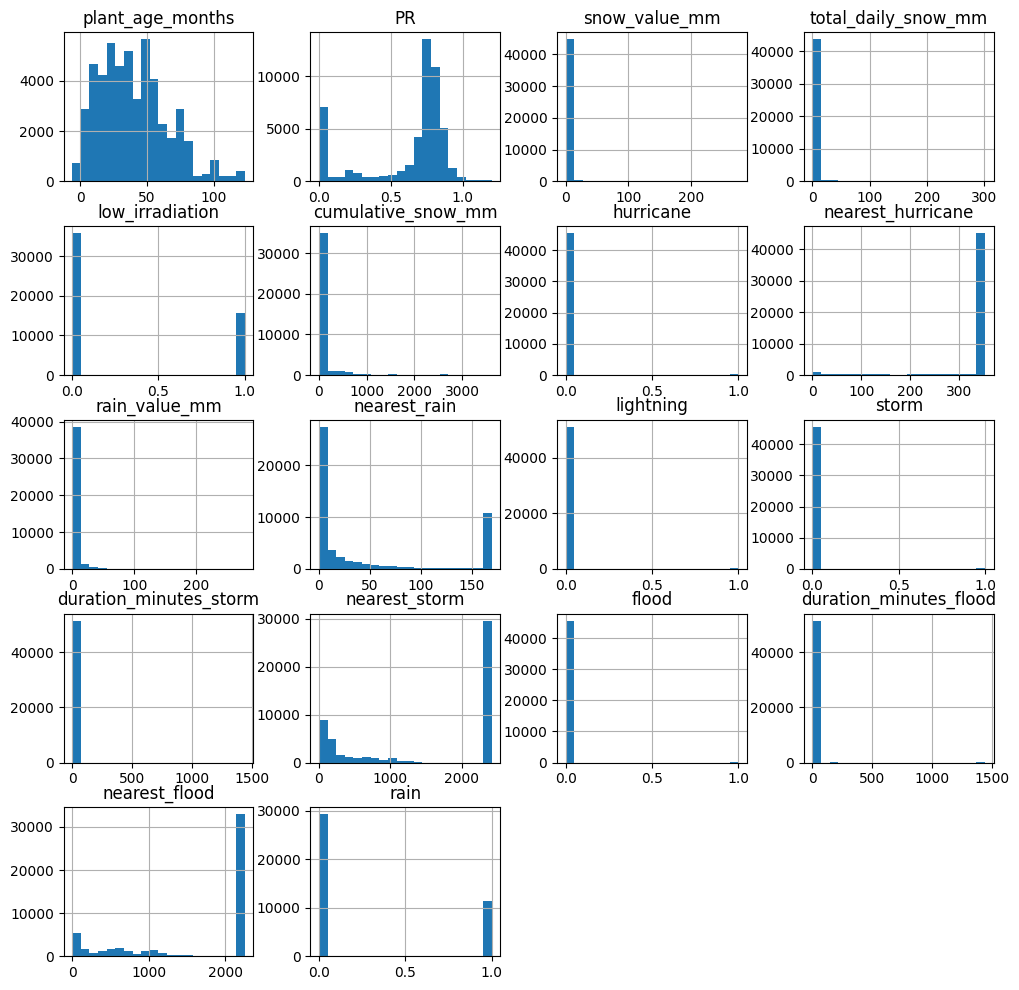

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

We try to see if repsonse variable "PR" is strongly correlated with the predictor variables and observe from the below plots that all **these numerical predictors show very little correlation with PR**. We have used 3 different correlation methods - pearson, spearman and kendall.

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

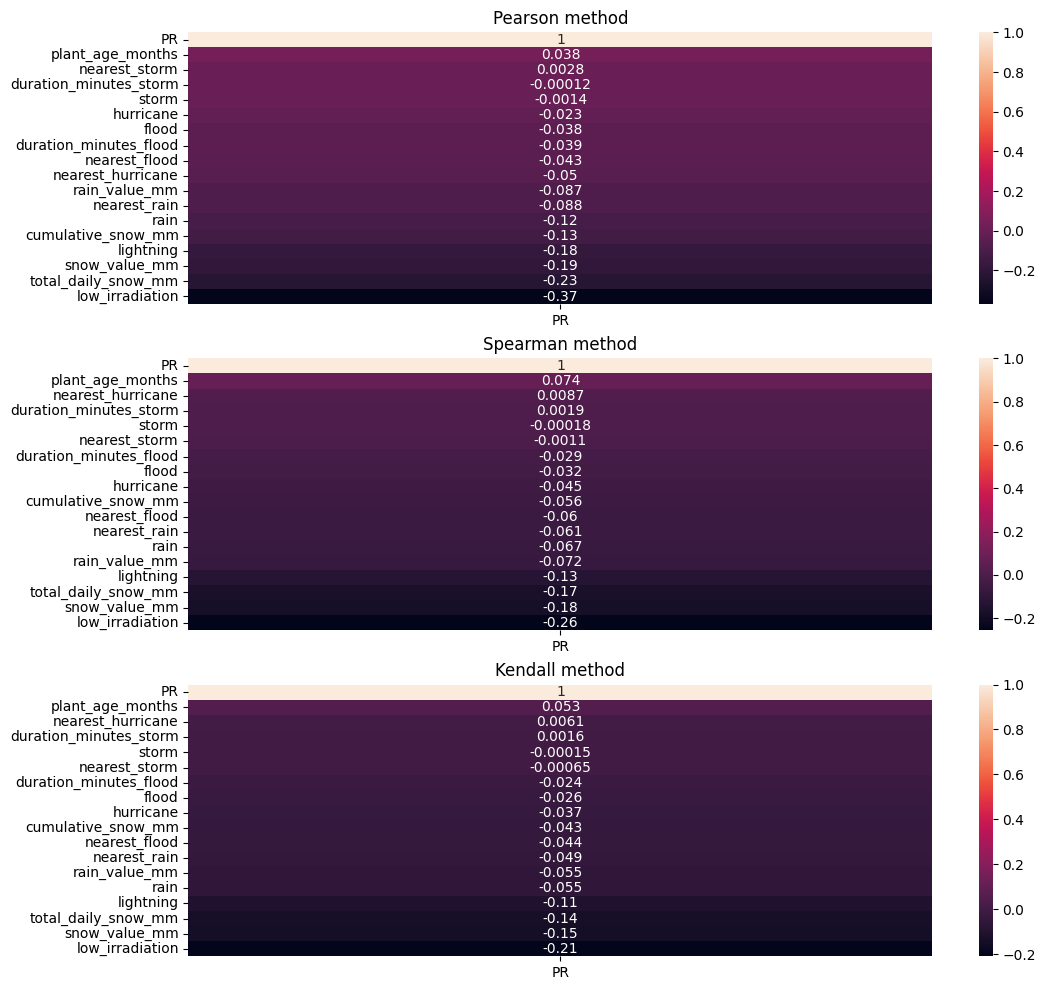

In [8]:
fig, ax = plt.subplots(3,1, figsize=(12, 12))
corr1 = numerical_data.corr('pearson')[['PR']].sort_values(by='PR', ascending=False)
corr2 = numerical_data.corr('spearman')[['PR']].sort_values(by='PR', ascending=False)
corr3 = numerical_data.corr('kendall')[['PR']].sort_values(by='PR', ascending=False)

ax[0].set_title('Pearson')
ax[1].set_title('Spearman')
ax[2].set_title('Kendall')

sb.heatmap(corr1, ax=ax[0], annot=True)
sb.heatmap(corr2, ax=ax[1], annot=True)
sb.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

**Reiterating the fact that low_irradiation is a binary variable and not a numerical variable with values 0 and 1 as depicted.**

In [9]:
#categoricalfeatures
categorical_data=energydata.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 20 numerical features: 

['randid', 'Date', 'NOAAClimRegion', 'TempZone', 'HumidZone', 'bin_PlantSize_kW', 'active_snow_tickets', 'snow_bin_ticket_minutes', 'snow_affected_assets', 'snow_production_level', 'hurr_bin_ticket_minutes', 'hurr_affected_assets', 'hurr_production_level', 'HurricanePrep', 'HurricanePostInspection', 'wind_speed_mean', 'storm_active_tickets', 'storm_bin_ticket_minutes', 'storm_affected_assets', 'storm_production_level']


In [10]:
#Summary statistics of categorical features
categorical_data.describe(include='object').T

,count,unique,top,freq
randid,51504,174,C3S33,739
Date,51504,739,3/1/2019,171
NOAAClimRegion,51504,9,West,23915
TempZone,51504,5,T5,23465
HumidZone,51504,4,H4,46103
bin_PlantSize_kW,51504,3,small,18083
active_snow_tickets,51504,2,No,50714
snow_bin_ticket_minutes,51504,3,None,50714
snow_affected_assets,51504,7,None,50714
snow_production_level,51437,3,Unknown,50714


In [11]:
# unique values counts, enumerate function usage referenced from lab walk through 0
unique_counts=categorical_data.nunique()

for index,i in enumerate(range(7),start=1):
    print(index,"{a} has {b} unique values".format(a=categorical_features[i],b=unique_counts[i]))

1 randid has 174 unique values
2 Date has 739 unique values
3 NOAAClimRegion has 9 unique values
4 TempZone has 5 unique values
5 HumidZone has 4 unique values
6 bin_PlantSize_kW has 3 unique values
7 active_snow_tickets has 2 unique values



randid



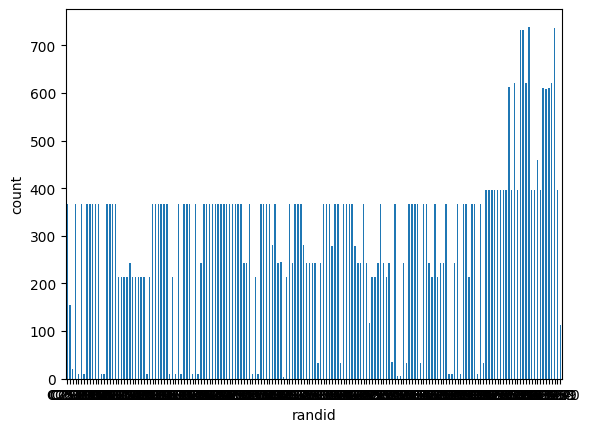


Date



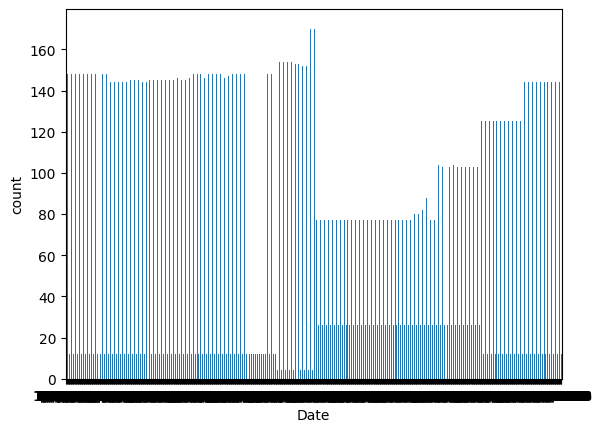


NOAAClimRegion



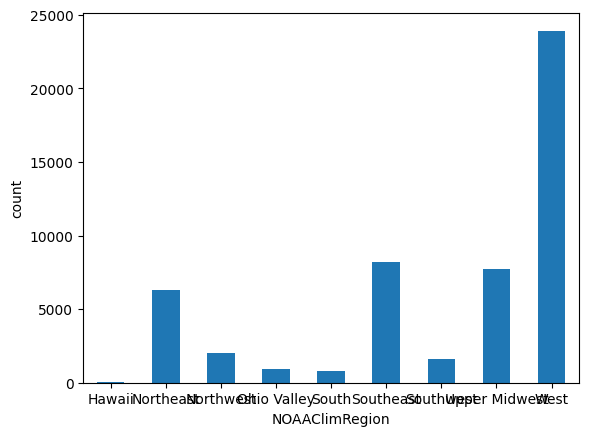


TempZone



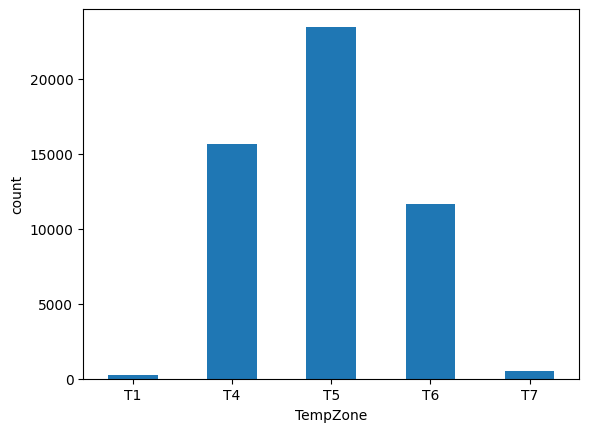


HumidZone



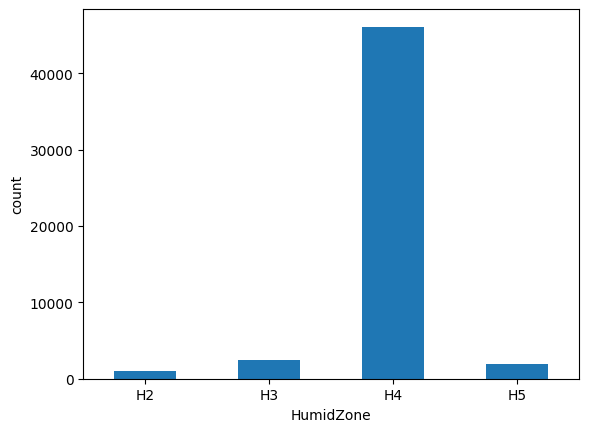


bin_PlantSize_kW



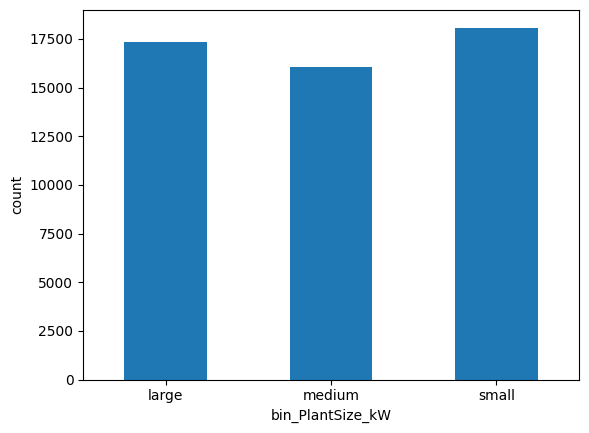


active_snow_tickets



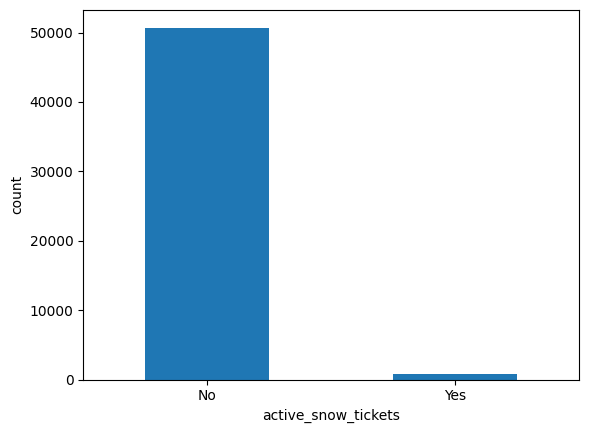


snow_bin_ticket_minutes



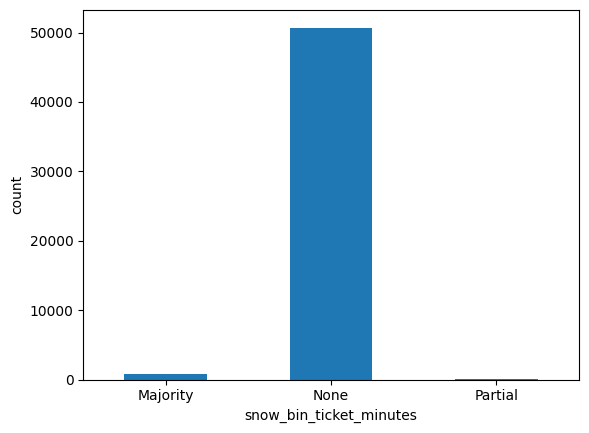


snow_affected_assets



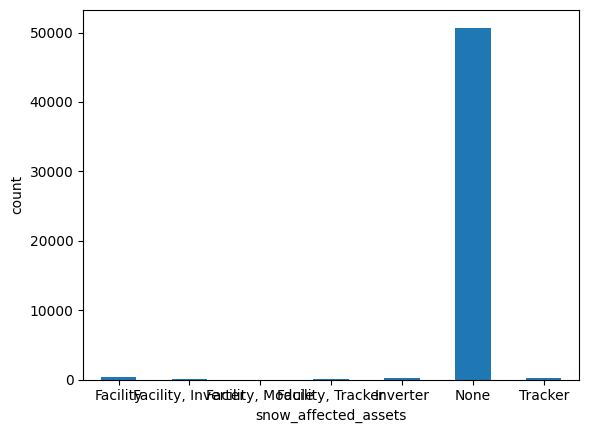


snow_production_level



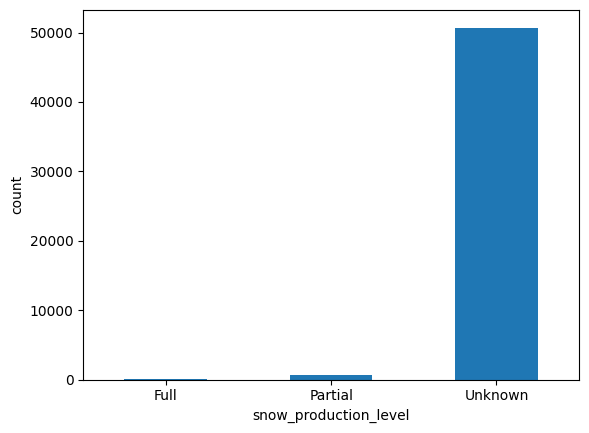


hurr_bin_ticket_minutes



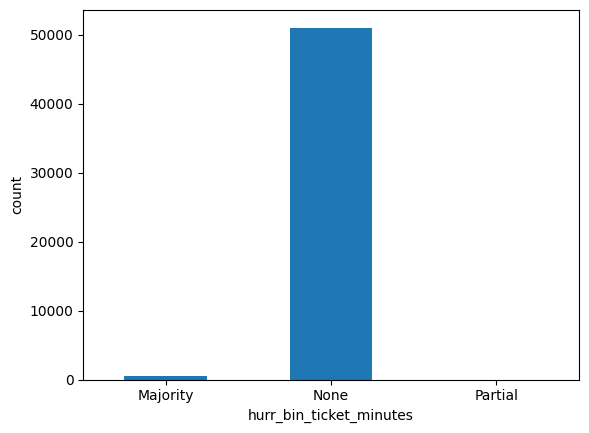


hurr_affected_assets



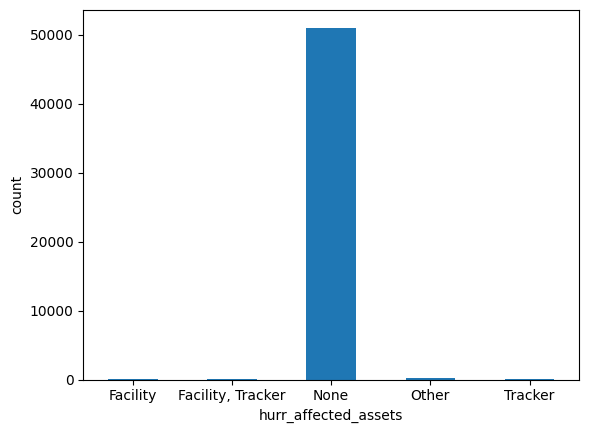


hurr_production_level



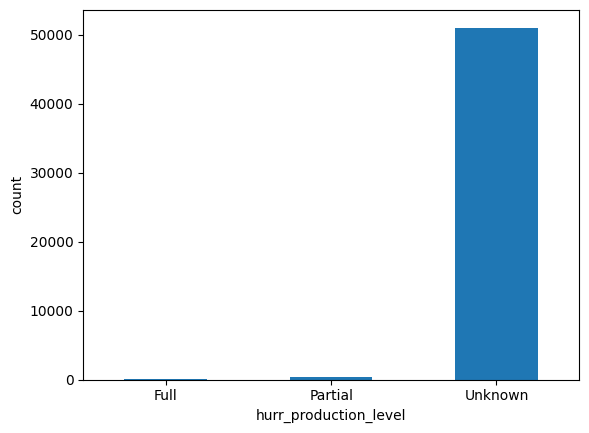


HurricanePrep



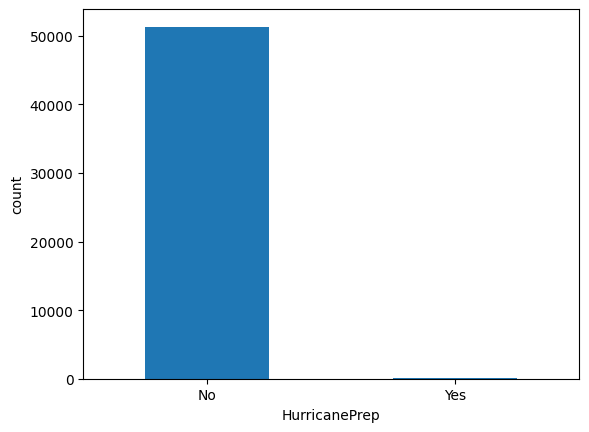


HurricanePostInspection



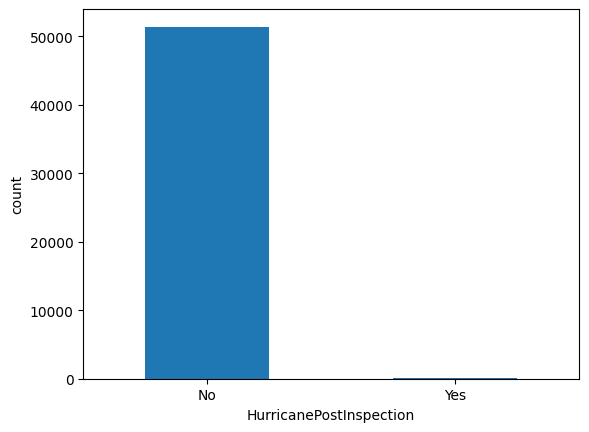


wind_speed_mean



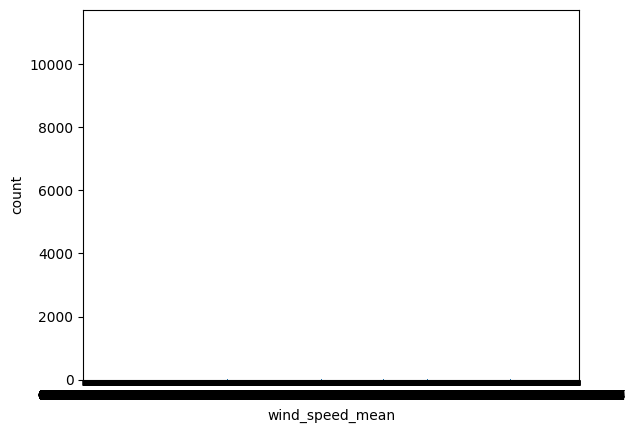


storm_active_tickets



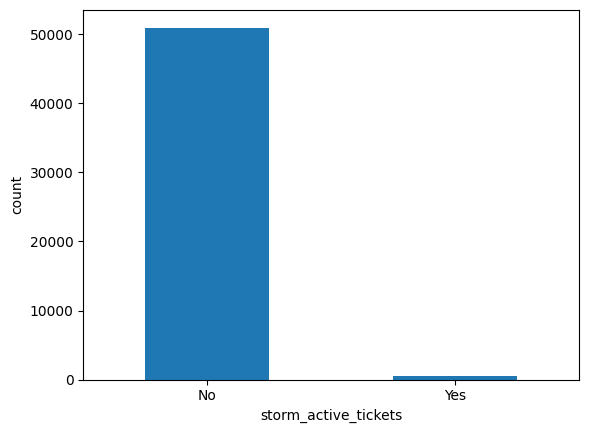


storm_bin_ticket_minutes



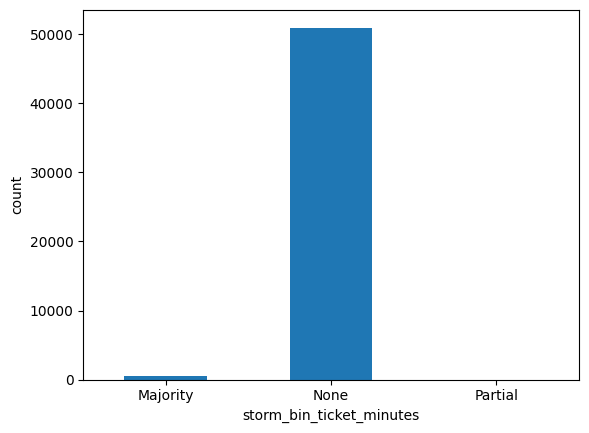


storm_affected_assets



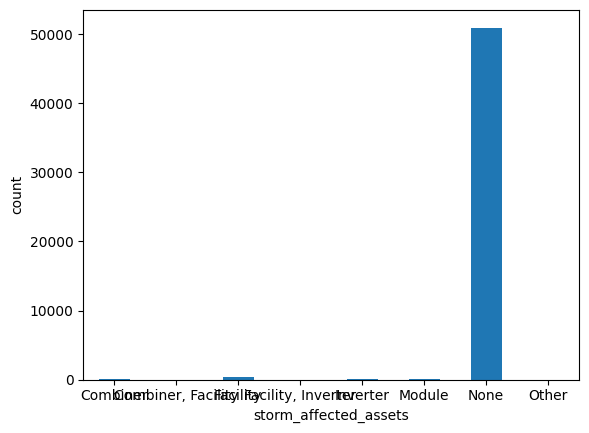


storm_production_level



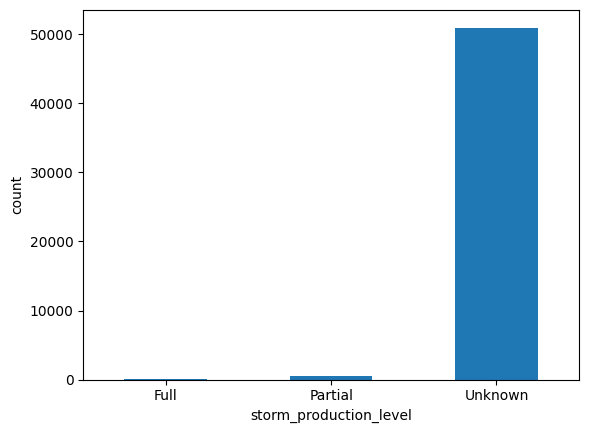

In [26]:
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n")
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

We see that most of the features are unbalanced except for a few like bin_PlantSize_kW, TempZone etc.

However, we are interested to see the imbalance in the target/response variable low_irradiation" to understand which performance metrices like accuracy, recall and precision might be a better choice to evaluate model. From below result it is evident that there is imbalance between two classes (approx 40%).

In [13]:
class_counts=energydata.groupby("low_irradiation").size()

columns=['low_irradiation','count','percentage']
low_irradiation=[0,1]
count=list()
percentage=list()

for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/51504)*100
    percentage.append(percent)

imbalance=pd.DataFrame(list(zip(low_irradiation,count,percentage)),columns=columns)
imbalance

,low_irradiation,count,percentage
0,0,35780,69.470332
1,1,15724,30.529668


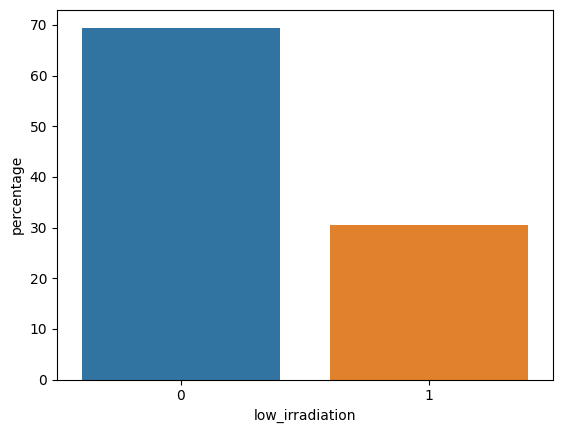

In [14]:
sb.barplot(data=imbalance,x=imbalance['low_irradiation'],y=imbalance['percentage'])
plt.show()

Now, let's impute missing values.
Reference - https://jamesrledoux.com/code/imputation

In [15]:
#Median imputation for numerical variables
#energydata_median_imputed = energydata.fillna(energydata.median())
energydata['PR'] = energydata['PR'].fillna(energydata['PR'].median())
energydata['snow_value_mm'] = energydata['snow_value_mm'].fillna(energydata['snow_value_mm'].median())
energydata['total_daily_snow_mm'] = energydata['total_daily_snow_mm'].fillna(energydata['total_daily_snow_mm'].median())
energydata['cumulative_snow_mm'] = energydata['cumulative_snow_mm'].fillna(energydata['cumulative_snow_mm'].median())
energydata['rain_value_mm'] = energydata['rain_value_mm'].fillna(energydata['rain_value_mm'].median())
energydata['plant_age_months'] = energydata['plant_age_months'].fillna(energydata['plant_age_months'].median())
energydata

,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,...,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
0,C2S1,4/1/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
1,C2S1,4/2/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
2,C2S1,4/3/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
3,C2S1,4/4/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
4,C2S1,4/5/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51499,C3S40,7/27/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,57,0.0,0,315,0.0
51500,C3S40,7/28/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,58,0.0,0,316,0.0
51501,C3S40,7/29/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,59,0.0,0,317,0.0
51502,C3S40,7/30/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,60,0.0,0,318,0.0


In [16]:
energydata.isnull().sum()

randid                          0
Date                            0
NOAAClimRegion                  0
TempZone                        0
HumidZone                       0
bin_PlantSize_kW                0
plant_age_months                0
active_snow_tickets             0
snow_bin_ticket_minutes         0
snow_affected_assets            0
snow_production_level          67
PR                              0
snow_value_mm                   0
total_daily_snow_mm             0
low_irradiation                 0
cumulative_snow_mm              0
hurr_bin_ticket_minutes         0
hurr_affected_assets            0
hurr_production_level          17
HurricanePrep                   0
HurricanePostInspection         0
hurricane                    5751
nearest_hurricane               0
wind_speed_mean                 0
rain_value_mm                   0
nearest_rain                    0
storm_active_tickets            0
storm_bin_ticket_minutes        0
storm_affected_assets           0
storm_producti

In [17]:
#Imputing the following variables with mode even though "rain", "storm", "flood" variables are categorical since python treats this a snumerical with values 0 and 1 and missing value.

mode_value_rain = energydata['rain'].mode()[0]
energydata['rain'].fillna(mode_value_rain, inplace=True)

mode_value_flood = energydata['flood'].mode()[0]
energydata['flood'].fillna(mode_value_flood, inplace=True)

mode_value_storm = energydata['storm'].mode()[0]
energydata['storm'].fillna(mode_value_storm, inplace=True)

mode_value_hurricane = energydata['hurricane'].mode()[0]
energydata['hurricane'].fillna(mode_value_hurricane, inplace=True)

energydata

,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,...,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
0,C2S1,4/1/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
1,C2S1,4/2/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
2,C2S1,4/3/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
3,C2S1,4/4/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
4,C2S1,4/5/2018,West,T6,H4,large,19.0,No,None,None,...,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51499,C3S40,7/27/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,57,0.0,0,315,0.0
51500,C3S40,7/28/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,58,0.0,0,316,0.0
51501,C3S40,7/29/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,59,0.0,0,317,0.0
51502,C3S40,7/30/2019,Southeast,T5,H4,medium,31.0,No,None,None,...,None,Unknown,0,0.0,0,60,0.0,0,318,0.0


In [18]:
#verifying the dataset
energydata.isnull().sum()

randid                       0
Date                         0
NOAAClimRegion               0
TempZone                     0
HumidZone                    0
bin_PlantSize_kW             0
plant_age_months             0
active_snow_tickets          0
snow_bin_ticket_minutes      0
snow_affected_assets         0
snow_production_level       67
PR                           0
snow_value_mm                0
total_daily_snow_mm          0
low_irradiation              0
cumulative_snow_mm           0
hurr_bin_ticket_minutes      0
hurr_affected_assets         0
hurr_production_level       17
HurricanePrep                0
HurricanePostInspection      0
hurricane                    0
nearest_hurricane            0
wind_speed_mean              0
rain_value_mm                0
nearest_rain                 0
storm_active_tickets         0
storm_bin_ticket_minutes     0
storm_affected_assets        0
storm_production_level      58
lightning                    0
storm                        0
duration

# Analyzing the Dataset

Now that we have viewed the dataset, we would predict the "PR" and "low_irradiation" using different regression and classification techniques  based on some combination of the dataset.

## Regression Techniques

1. Multiple Linear regression using OLS

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
#Extracting day, month and year from "Date"" into columns
#Reference  - https://sparkbyexamples.com/pandas/pandas-get-day-month-and-year-from-datetime/
energydata["Date"]= pd.to_datetime(energydata[ "Date"])
energydata['Day']=energydata[ "Date"].dt.day
energydata["Date"]= pd.to_datetime(energydata[ "Date"])
energydata['Month']=energydata[ "Date"].dt.month
energydata["Date"]= pd.to_datetime(energydata[ "Date"])
energydata['Year']=energydata[ "Date"].dt.year
energydata

,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,...,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain,Day,Month,Year
0,C2S1,2018-04-01,West,T6,H4,large,19.0,No,None,None,...,0.0,0,2420,0.0,0,2255,0.0,1,4,2018
1,C2S1,2018-04-02,West,T6,H4,large,19.0,No,None,None,...,0.0,0,2420,0.0,0,2255,0.0,2,4,2018
2,C2S1,2018-04-03,West,T6,H4,large,19.0,No,None,None,...,0.0,0,2420,0.0,0,2255,0.0,3,4,2018
3,C2S1,2018-04-04,West,T6,H4,large,19.0,No,None,None,...,0.0,0,2420,0.0,0,2255,0.0,4,4,2018
4,C2S1,2018-04-05,West,T6,H4,large,19.0,No,None,None,...,0.0,0,2420,0.0,0,2255,0.0,5,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51499,C3S40,2019-07-27,Southeast,T5,H4,medium,31.0,No,None,None,...,0.0,0,57,0.0,0,315,0.0,27,7,2019
51500,C3S40,2019-07-28,Southeast,T5,H4,medium,31.0,No,None,None,...,0.0,0,58,0.0,0,316,0.0,28,7,2019
51501,C3S40,2019-07-29,Southeast,T5,H4,medium,31.0,No,None,None,...,0.0,0,59,0.0,0,317,0.0,29,7,2019
51502,C3S40,2019-07-30,Southeast,T5,H4,medium,31.0,No,None,None,...,0.0,0,60,0.0,0,318,0.0,30,7,2019


In [ ]:
#Reference used -  https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
y=energydata['PR']
X=energydata[['Day','Month','Year','plant_age_months','snow_value_mm','total_daily_snow_mm', 'cumulative_snow_mm', 'hurricane', 'nearest_hurricane', 'rain_value_mm', 'nearest_rain', 'lightning', 'storm', 'duration_minutes_storm', 'nearest_storm', 'flood', 'duration_minutes_flood', 'nearest_flood', 'rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients = pd.DataFrame(data = model_coefficients,
                              index = feature_names,
                              columns = ['Coefficient value'])
print(coefficients)

                        Coefficient value
Day                              0.000306
Month                           -0.008335
Year                            -0.070495
plant_age_months                 0.000453
snow_value_mm                   -0.001584
total_daily_snow_mm             -0.002572
cumulative_snow_mm              -0.000024
hurricane                       -0.122258
nearest_hurricane               -0.000193
rain_value_mm                   -0.001329
nearest_rain                    -0.000417
lightning                       -0.586387
storm                           -0.005993
duration_minutes_storm           0.000046
nearest_storm                    0.000022
flood                           -0.082986
duration_minutes_flood          -0.000368
nearest_flood                   -0.000016
rain                            -0.035579


Interpretation of the coefficients - For a unit increase in lightning, PR decreases by 0.586387 units and for a unit increase in plant_age_months, PR increases by 0.00453 and so on. We can observe from the above list that lightning, hurricane, flood have the highest impact comparatively although in absolute values, these are **not the strongest correlations**.

Now, we make predictions with the above model.

In [ ]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

         Actual  Predicted
543    0.774798   0.715872
23967  0.708579   0.633685
41770  0.618758   0.563343
22060  0.600001   0.584669
11429  0.000000   0.670338
...         ...        ...
44668  0.789966   0.633018
15353  0.730838   0.651973
2237   0.827550   0.680665
45045  0.873304   0.613330
23144  0.826519   0.606705

[10301 rows x 2 columns]


Evaluating the model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.21
Mean squared error: 0.08
Root mean squared error: 0.28


The mae score of 0.21 seems good but we need to figure out if this is consistent across the dataset.

In [ ]:
regressor.score(X_test, y_test)  #R squared value

0.08795469670310885

The model explains only 8.8% of the test data which is a very poor result. Let's see for our training data.

In [ ]:
regressor.score(X_train, y_train)

0.10540610732176614

The model explains only 10.54% of the training data which is again a poor result.

In [ ]:
#Reference used - https://www.statology.org/k-fold-cross-validation-in-python/

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statistics

#defined the cross-validation method that we will use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
statistics.mean(abs(scores))


0.21230124578395682

Cross validation using kfold gives us the score as 0.2123 which is again very poor.
We will next try to analyze using a variant of OLS, the ridge regression and see if there is any improvement.

When it comes to model interpretability, I don't think the model is interpretable as the MAE is only 0.21 and we are able to explain a very low percentage of the dataset, both training and testing.

2. Ridge regression

In [ ]:
#cross validation using k fold
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = Ridge(alpha=1.0)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.212 (0.003)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
model1 = Ridge(alpha=1.0)
model1.fit(X_train1, y_train1)

Ridge()

In [ ]:
feature_names1 = X.columns
model_coefficients1 = model1.coef_

coefficients1 = pd.DataFrame(data = model_coefficients1,
                              index = feature_names1,
                              columns = ['Coefficient value'])
print(coefficients1)

                        Coefficient value
Day                              0.000306
Month                           -0.008336
Year                            -0.070499
plant_age_months                 0.000453
snow_value_mm                   -0.001584
total_daily_snow_mm             -0.002572
cumulative_snow_mm              -0.000024
hurricane                       -0.121700
nearest_hurricane               -0.000193
rain_value_mm                   -0.001331
nearest_rain                    -0.000417
lightning                       -0.584418
storm                           -0.005940
duration_minutes_storm           0.000046
nearest_storm                    0.000022
flood                           -0.080717
duration_minutes_flood          -0.000370
nearest_flood                   -0.000016
rain                            -0.035573


In [ ]:
y_pred1 = model1.predict(X_test1)
results2 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
print(results2)

         Actual  Predicted
543    0.774798   0.715868
23967  0.708579   0.633651
41770  0.618758   0.563272
22060  0.600001   0.584623
11429  0.000000   0.670330
...         ...        ...
44668  0.789966   0.633022
15353  0.730838   0.651947
2237   0.827550   0.680645
45045  0.873304   0.613357
23144  0.826519   0.606697

[10301 rows x 2 columns]


We don't see much difference in the values predicted when compared to linear regression using OLS.

In [ ]:
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)

print(f'Mean absolute error: {mae1:.2f}')
print(f'Mean squared error: {mse1:.2f}')
print(f'Root mean squared error: {rmse1:.2f}')

Mean absolute error: 0.21
Mean squared error: 0.08
Root mean squared error: 0.28


In [ ]:
model1.score(X_test1, y_test1)  #R squared value

0.08795397898453516

In [ ]:
model1.score(X_train1, y_train1)

0.10540571792300835

When it comes to model interpretability, it is the same as we saw for OLS. There is hardly much difference.

# Classification Techniques

1. Random Forest Classifier

In [ ]:
y2= energydata['low_irradiation']
X2=energydata[['Day','Month','Year','snow_value_mm','total_daily_snow_mm', 'cumulative_snow_mm', 'hurricane', 'nearest_hurricane', 'rain_value_mm', 'nearest_rain', 'lightning', 'storm', 'duration_minutes_storm', 'nearest_storm', 'flood', 'duration_minutes_flood', 'nearest_flood', 'rain']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=42)
rfc.fit(X_train2, y_train2)
y_pred2 = rfc.predict(X_test2)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


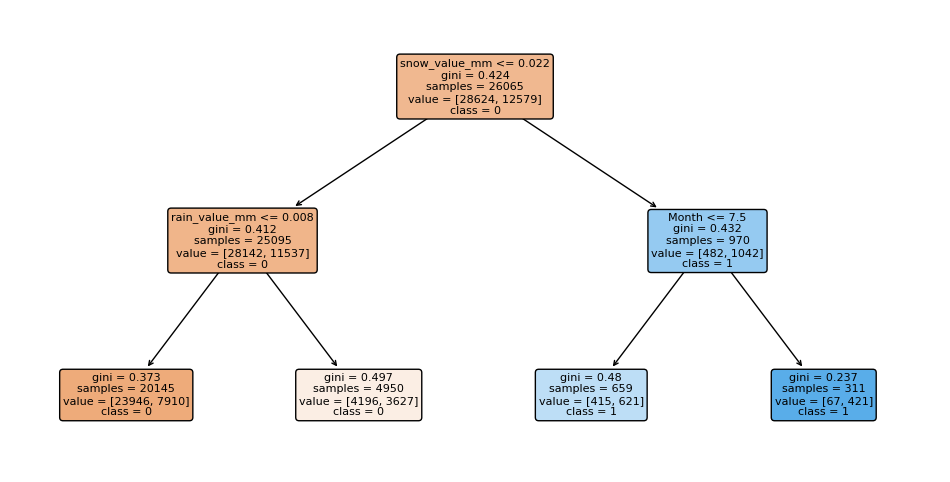

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


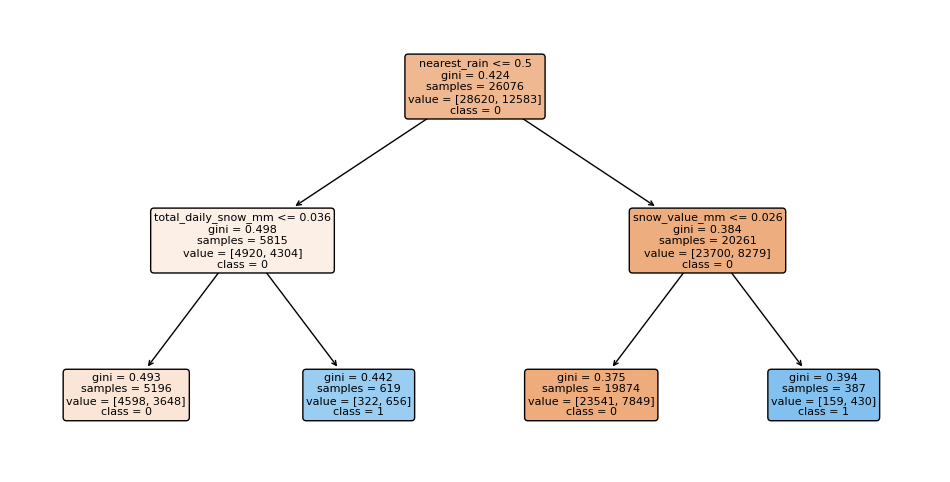

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


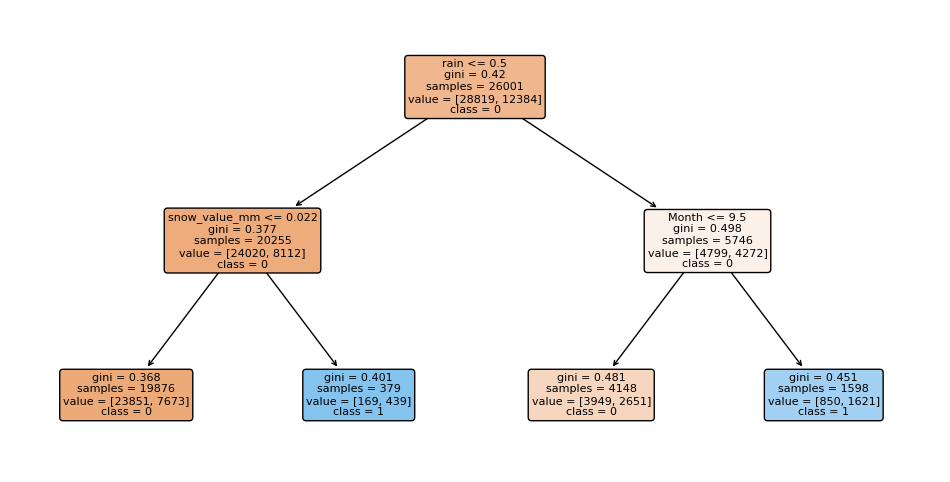

In [ ]:
from sklearn import tree

features = X2.columns.values
classes = ['0', '1']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      7180
           1       0.66      0.20      0.31      3121

    accuracy                           0.73     10301
   macro avg       0.70      0.58      0.57     10301
weighted avg       0.71      0.73      0.67     10301



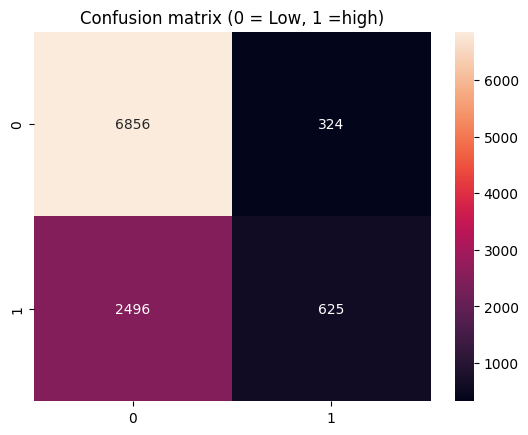

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

c = confusion_matrix(y_test2, y_pred2)
sb.heatmap(c, annot=True, fmt='d').set_title('Confusion matrix (0 = Low, 1 =high)')

print(classification_report(y_test2,y_pred2))

From the classification report, we see that precision for class 0 is moderately good and for class 1 it is okay. Recall for class 0 is excellent (0.95) as opposed to 0.20 for class 1 which is very poor. Finally, the f1 scores for both classes which summarizes precision and recall suggest that the model is doing quite good for class 0 and very poor for class 1.
The accuracy achieved by the classifer is okay (73%).

Let us look at the importances of features now.



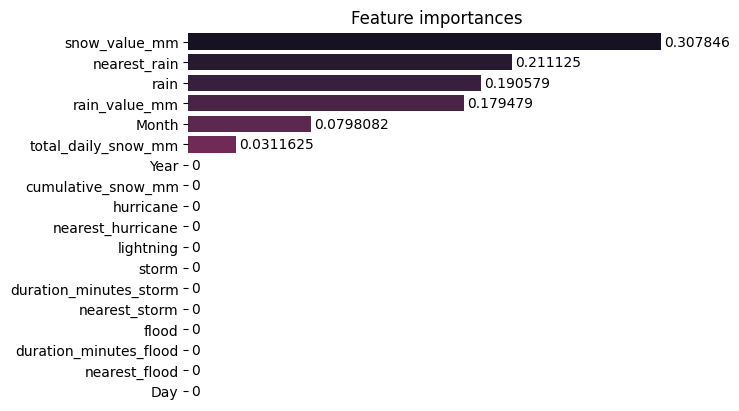

In [ ]:
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

#Data is being sorted from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sb.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sb.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

Feature importance is highest for snow_value_mm, nearest_rain, followed by rain, rain_value_mm and month.

2. Decision Tree Classifier

In [21]:
y3= energydata['low_irradiation']
X3=energydata[['Day','Month','Year','snow_value_mm','total_daily_snow_mm', 'cumulative_snow_mm', 'hurricane', 'nearest_hurricane', 'rain_value_mm', 'nearest_rain', 'lightning', 'storm', 'duration_minutes_storm', 'nearest_storm', 'flood', 'duration_minutes_flood', 'nearest_flood', 'rain']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3,
                                                    test_size=0.2,
                                                    random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier()
classifier3.fit(X_train3, y_train3)

DecisionTreeClassifier()

In [23]:
y_pred3 = classifier3.predict(X_test3)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7180
           1       0.74      0.68      0.71      3121

    accuracy                           0.83     10301
   macro avg       0.80      0.79      0.79     10301
weighted avg       0.83      0.83      0.83     10301



Text(0.5, 1.0, 'Confusion matrix (0 = Low, 1 = High)')

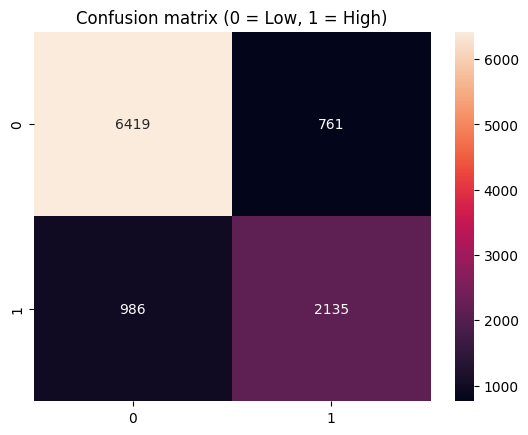

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
c3=confusion_matrix(y_test3, y_pred3)
print(classification_report(y_test3, y_pred3))
sb.heatmap(c3, annot=True, fmt='d').set_title('Confusion matrix (0 = Low, 1 = High)')

From the classification report, we see that precision for class 0 is decent(0.87) and for class 1(0.74) it is okay. Recall for class 0 is decent (0.89) as opposed to 0.68 for class 1 which is moderately poor. Finally, the f1 scores for both classes have improved significantly and suggest that the model is doing quite good for class 0 and okay for class 1.
The accuracy achieved by the classifer is decent this time (83%).

## Conclusion

To conclude, the regression model had very poor accuracy and this analyses may not prove very useful. On the contrary, the classififcation models fared better especially the decision tree classifier which predicted the low_irradiation values.

In future, we could have a database that expands to other countries and continents like Europe where there is significant emphasis on sustainability and clean energy generation. Also, I believe that we could have another parameter that factors in weather phenomenons like El nino and la nina (https://www.climate.gov/enso) as these adversely affect the normal weather conditions. Fun fact : We have an el nino weather system currently in 2023 that could mean adverse weather conditions.

**Prompt 1 :** Suppose that some of the weather-related variables end up being in the regression/classification models you ultimately recommend. The true value of these quantities may not be observed until the day in question, in which case you have already observed the performance ratio and/or irradiation. For these weather-related variables to be used in practice for predicting the performance ratio or irradiation, we would need some day-ahead forecast of them. Any such forecast has uncertainty associated with it, e.g., we might only be able to predict tomorrow's wind speed as 10 m/s +/- 2 m/s. How would you incorporate this uncertainty surrounding the predictors in your predictions for the response?








I think a better way to handle these uncertainties would be to have some sort of probabilistic model that governs our analyis of this dataset. My reasoning is that if we have a probability instead of an absolute or point estimate, we will be able to account for those uncertainties which otherwise would give us an erroneous result. The central idea is that we need to have some tolerance and confidence in the predicted responses and that according to me can be captured in a probabilistic model.

**Prompt 2 :** Describe at least three limitations of your study. Examples include the unavailability of certain data and simplifying assumptions made. Explain how these might be addressed given additional time and resources.



1. I could have reduced the number of predictor variables using Principal Component Analysis and included only relevant ones that would make a difference to the output. Presently, the analyses include mostly all the variables and that could have inadvertently introduced errors.

2. For data preparation, I could have been specific when it came to imputing missing values. In this analysis, I just generalized numerical data imputation using mean values which could have been dealt with differently.

3. My study doesn't factor in the unbalanced nature of the dataset. The data appeared unbalanced for majority of the predictors as is evident from the histogram plots. I think that skewness could have been handled in a better manner. One way I can think is by extrapolating and expanding on the balanced part of the data using some transofrmation or by implementing Generative Adversarial Network (GAN) or by simply using oversampling techniques)
Reference used - https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/